This notebook is for visualizing the new TF-Modisco results for ZF1 from CTCF.

In [1]:
# Import necessary dependencies

%matplotlib inline
import numpy as np
import modisco
import sys
print (sys.version)
import os

TF-MoDISco is using the TensorFlow backend.


2.7.15 |Anaconda custom (64-bit)| (default, Oct 10 2018, 21:32:13) 
[GCC 7.3.0]


Save and print the results.

Metaclusters heatmap


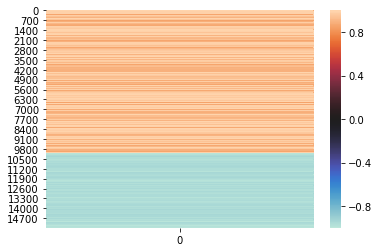

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 1044
Task 0 hypothetical scores:


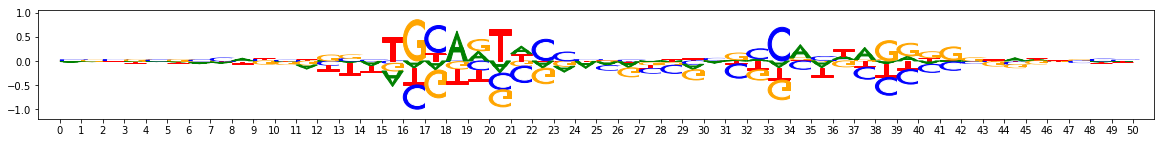

Task 0 actual importance scores:


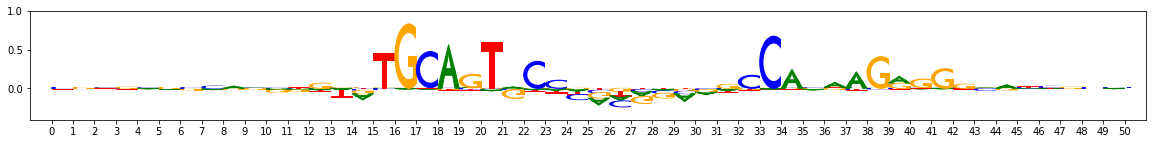

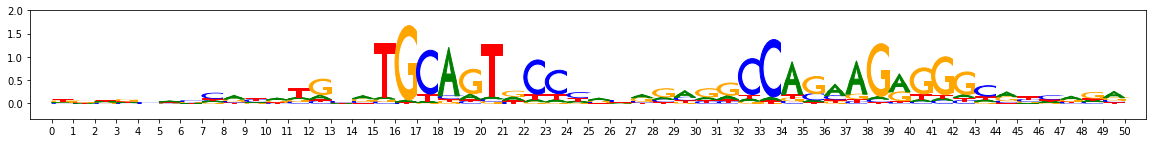

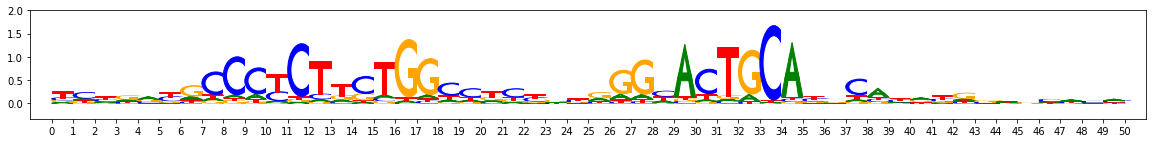

metacluster_0 pattern_1
total seqlets: 489
Task 0 hypothetical scores:


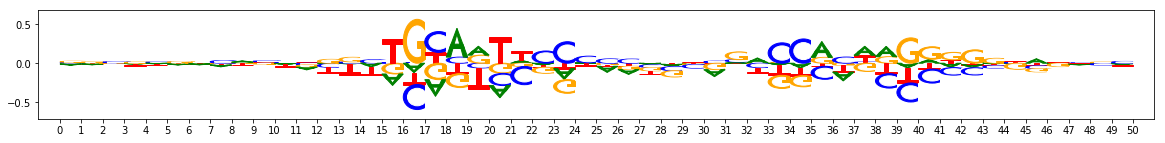

Task 0 actual importance scores:


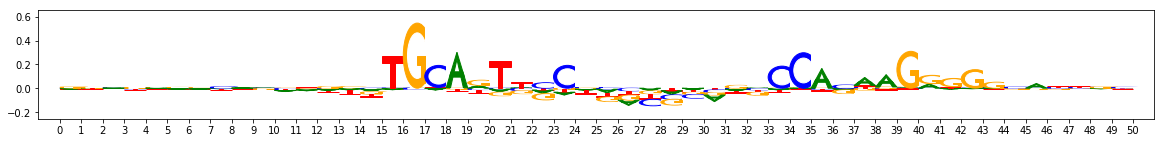

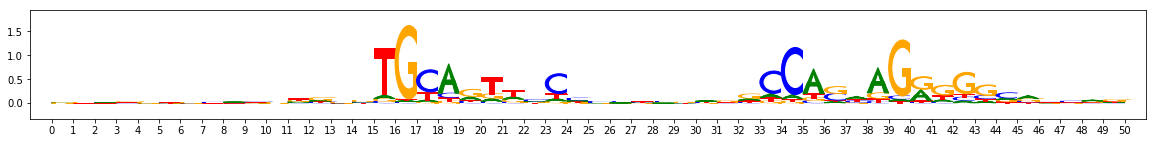

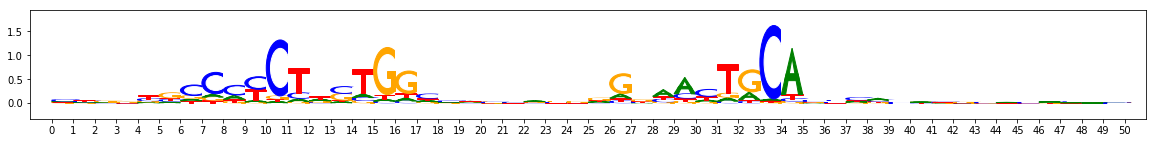

metacluster_0 pattern_2
total seqlets: 162
Task 0 hypothetical scores:


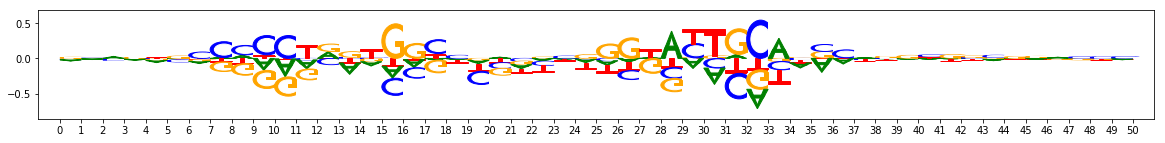

Task 0 actual importance scores:


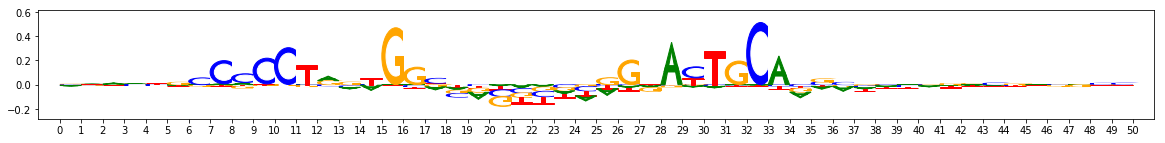

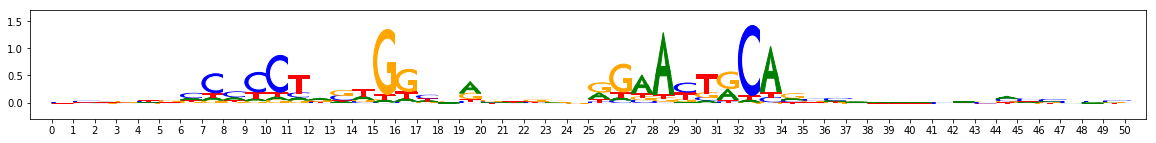

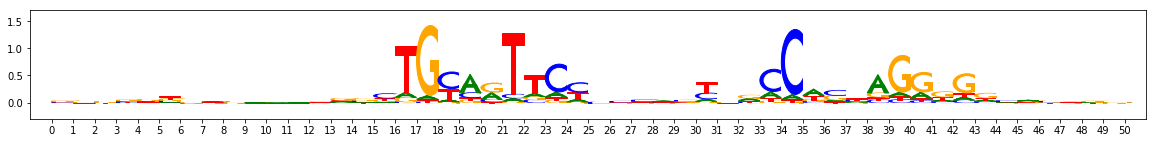

metacluster_0 pattern_3
total seqlets: 135
Task 0 hypothetical scores:


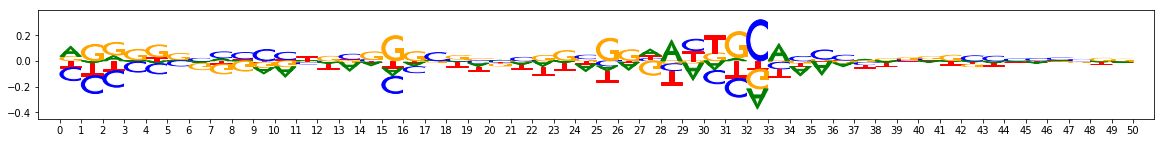

Task 0 actual importance scores:


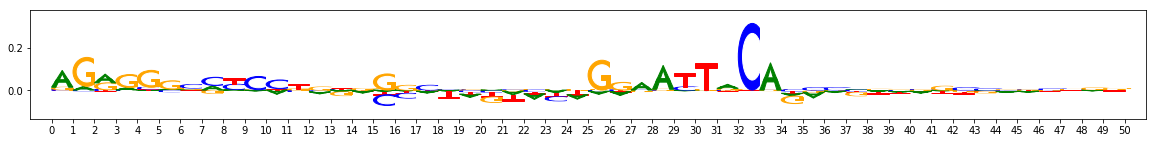

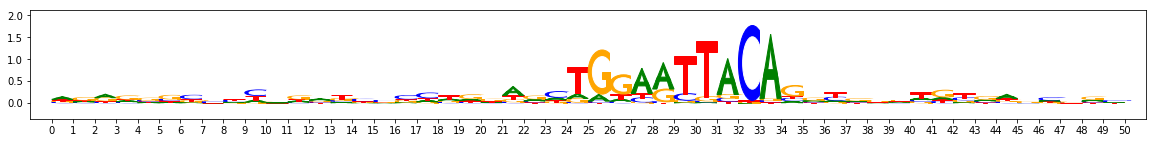

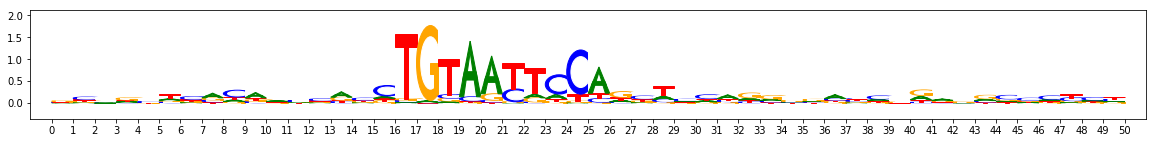

metacluster_0 pattern_4
total seqlets: 73
Task 0 hypothetical scores:


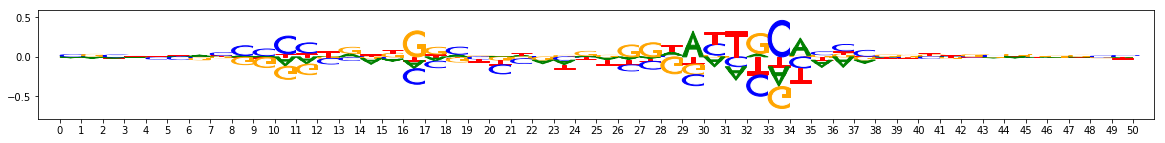

Task 0 actual importance scores:


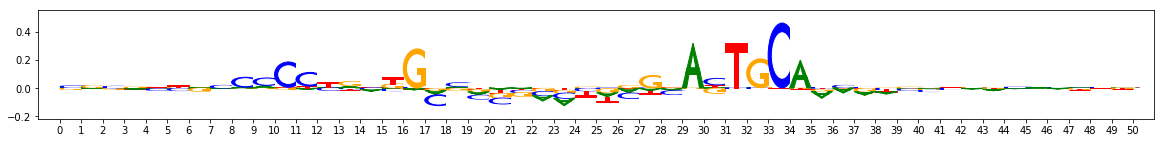

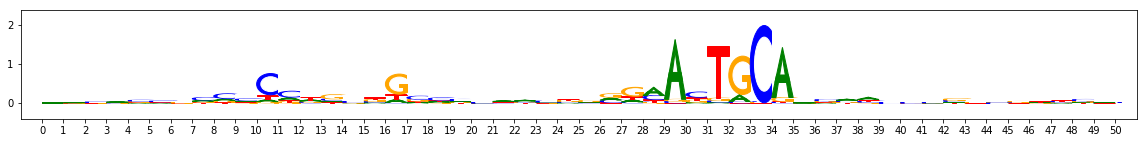

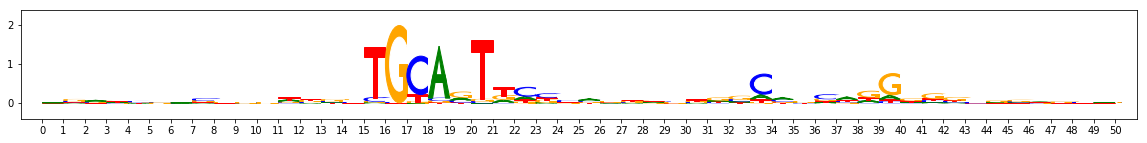

metacluster_0 pattern_5
total seqlets: 68
Task 0 hypothetical scores:


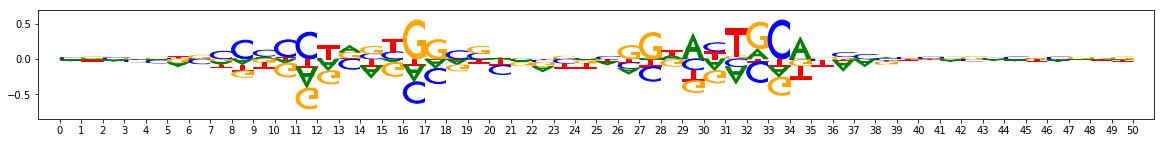

Task 0 actual importance scores:


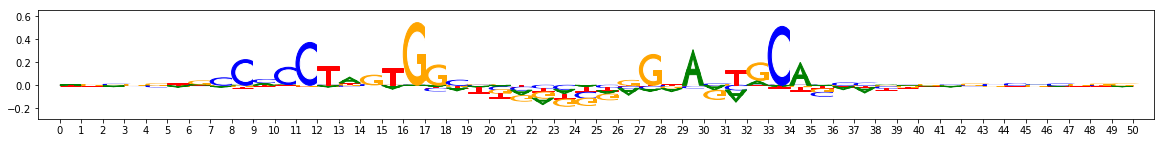

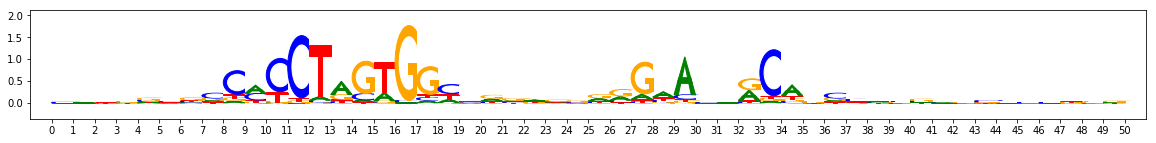

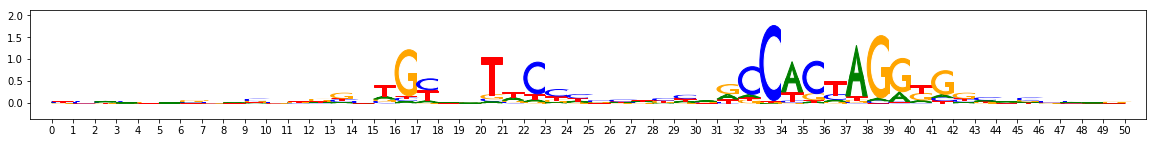

metacluster_0 pattern_6
total seqlets: 37
Task 0 hypothetical scores:


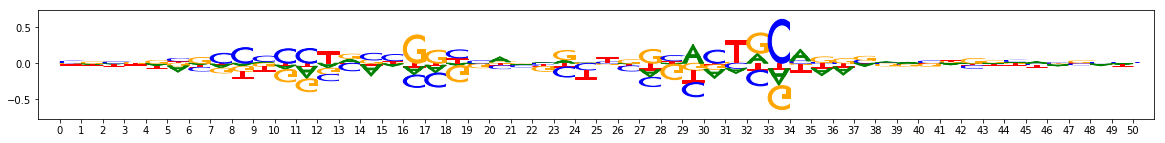

Task 0 actual importance scores:


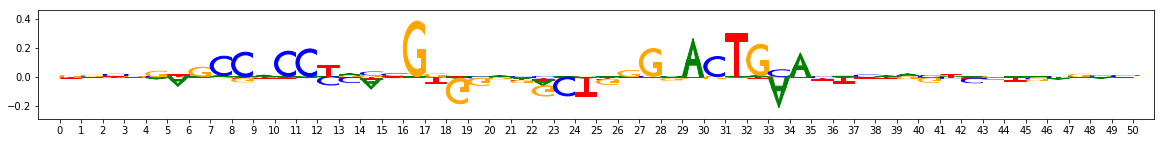

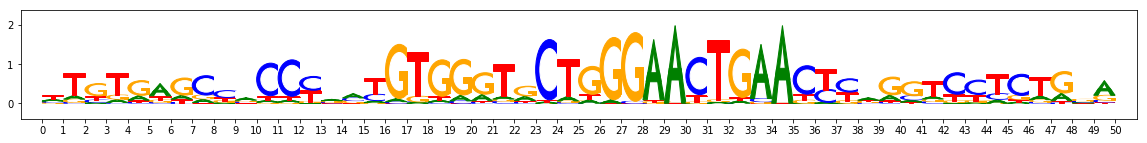

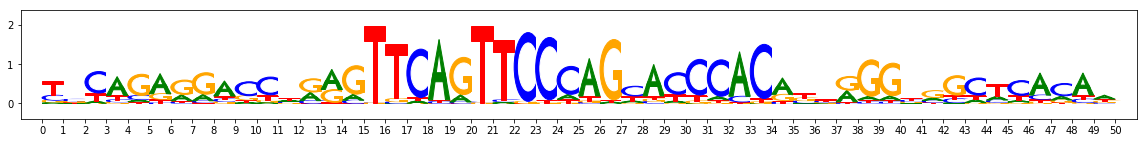

metacluster_1
activity pattern: [-1]
metacluster_1 pattern_0
total seqlets: 573
Task 0 hypothetical scores:


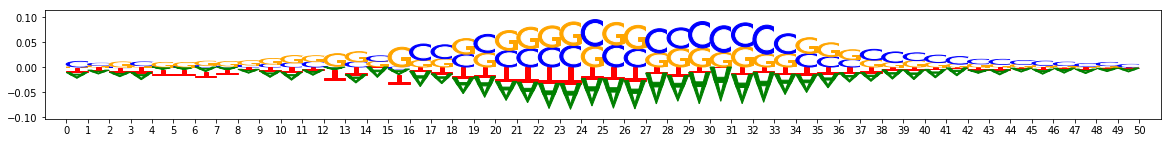

Task 0 actual importance scores:


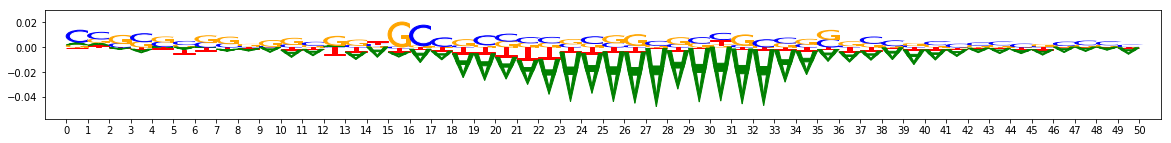

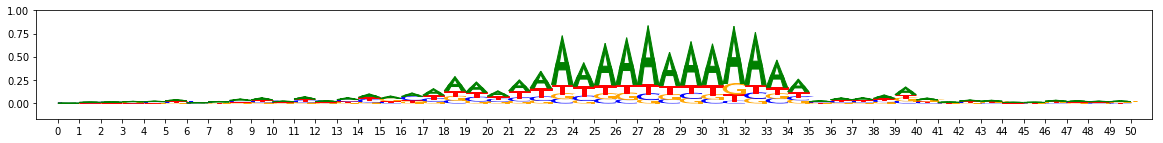

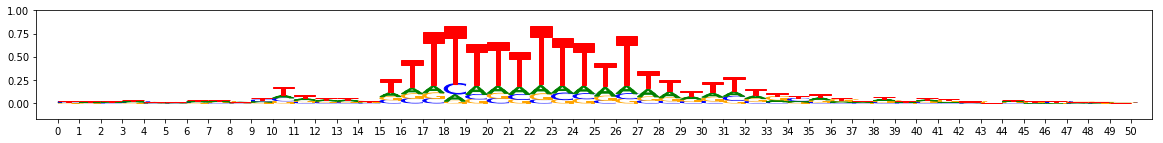

metacluster_1 pattern_1
total seqlets: 396
Task 0 hypothetical scores:


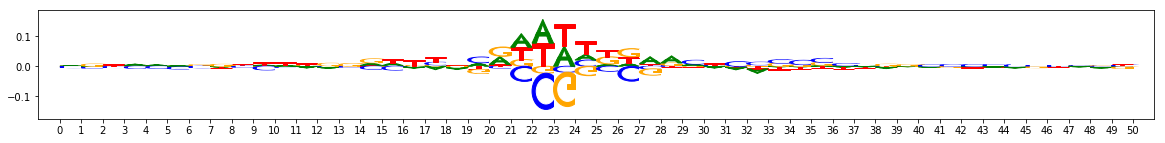

Task 0 actual importance scores:


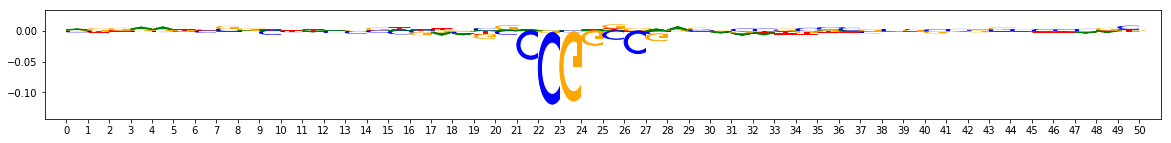

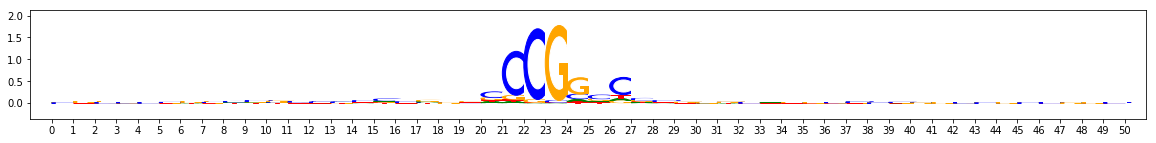

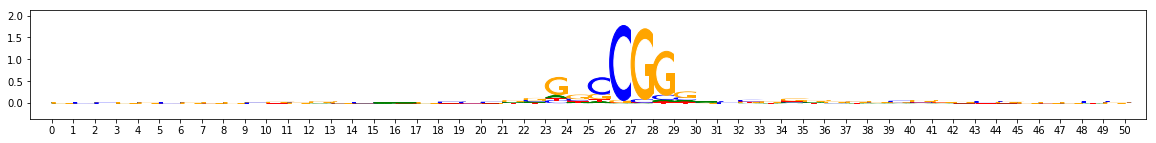

metacluster_1 pattern_2
total seqlets: 207
Task 0 hypothetical scores:


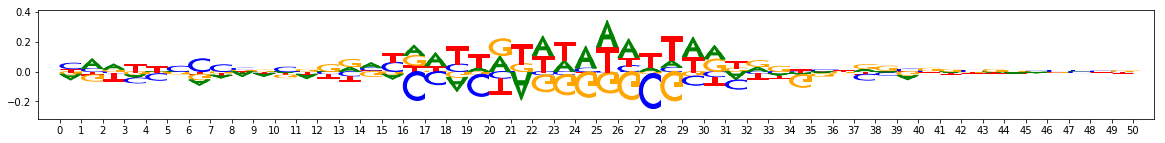

Task 0 actual importance scores:


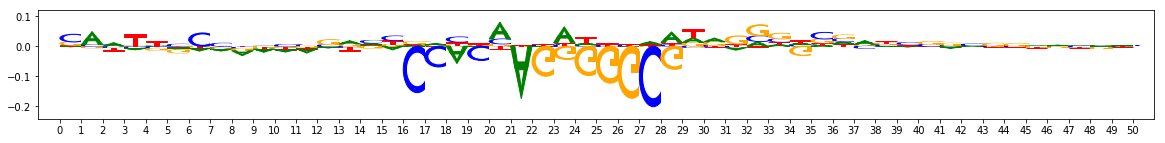

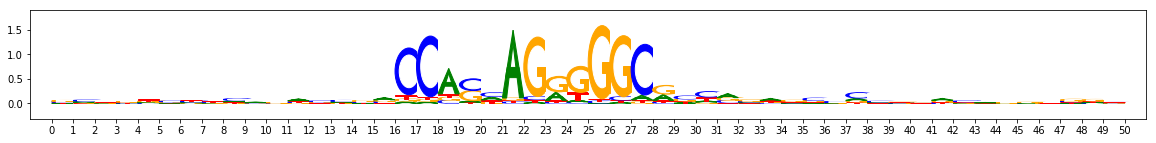

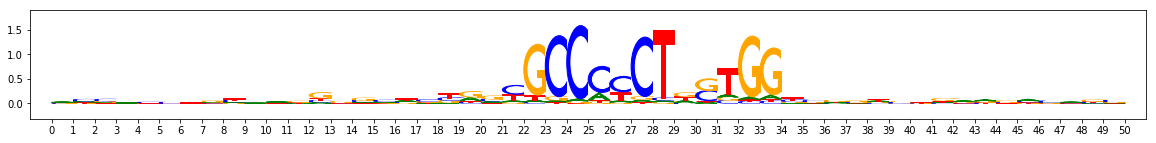

metacluster_1 pattern_3
total seqlets: 189
Task 0 hypothetical scores:


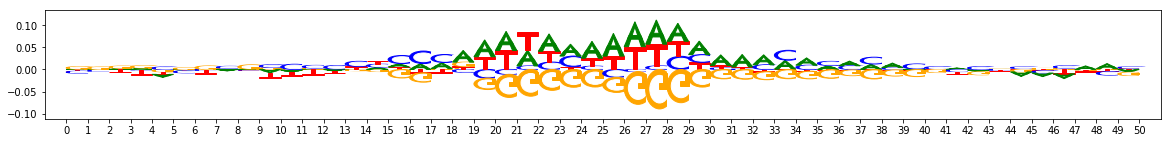

Task 0 actual importance scores:


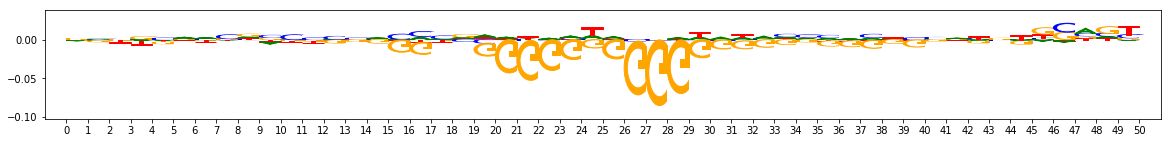

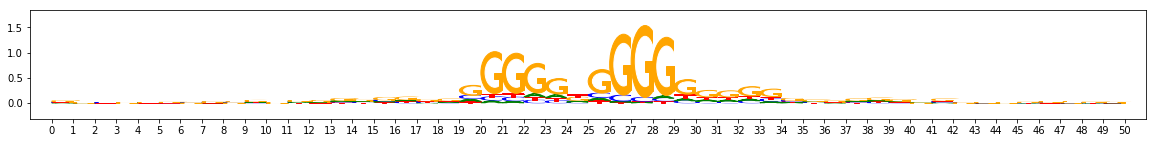

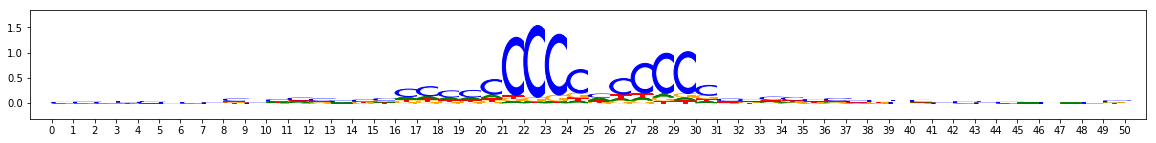

metacluster_1 pattern_4
total seqlets: 177
Task 0 hypothetical scores:


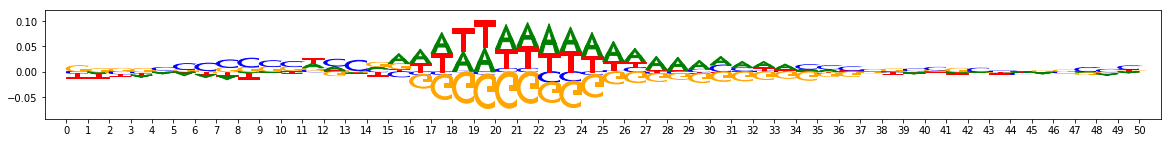

Task 0 actual importance scores:


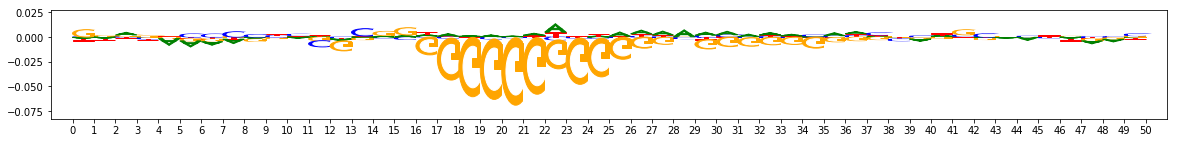

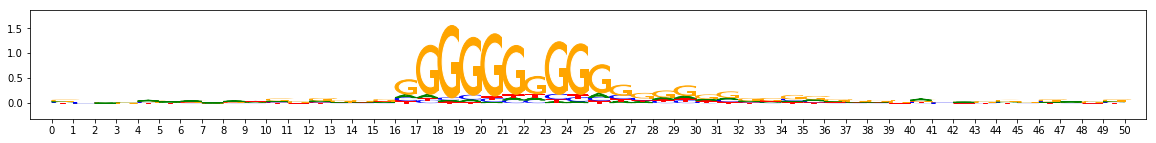

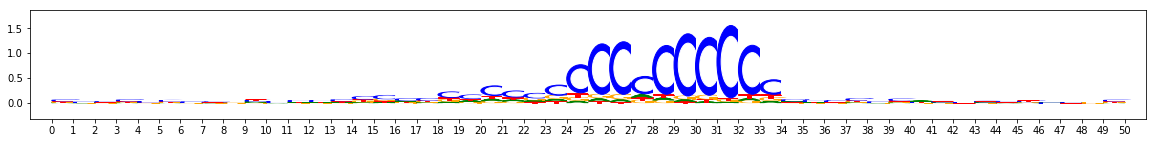

metacluster_1 pattern_5
total seqlets: 158
Task 0 hypothetical scores:


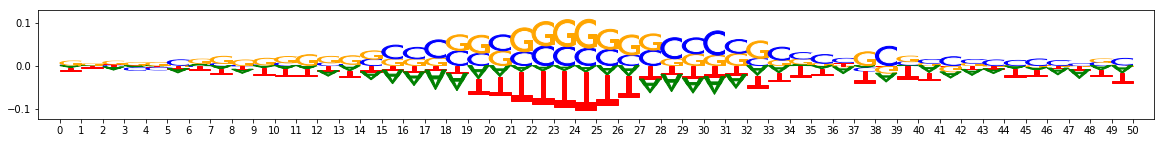

Task 0 actual importance scores:


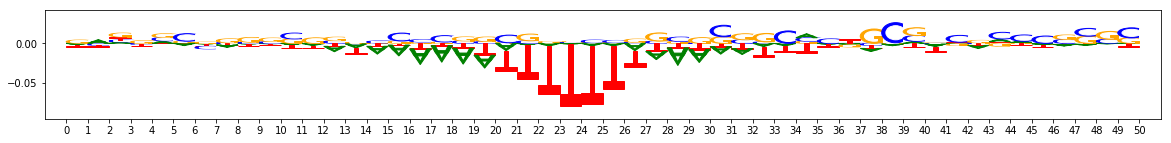

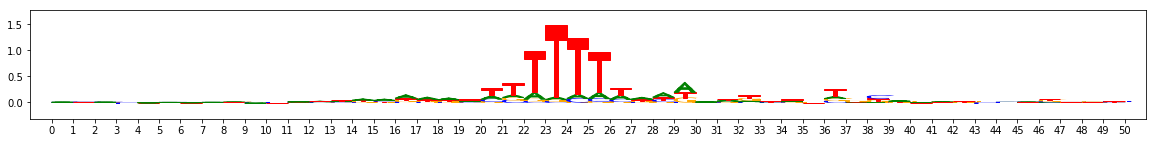

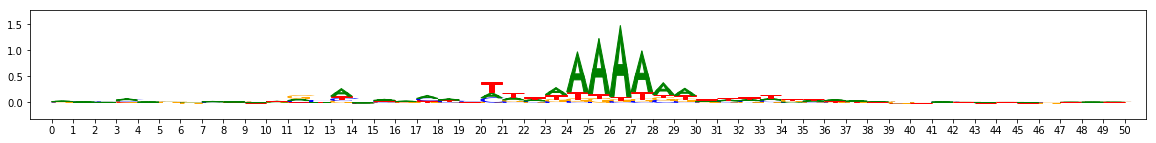

metacluster_1 pattern_6
total seqlets: 153
Task 0 hypothetical scores:


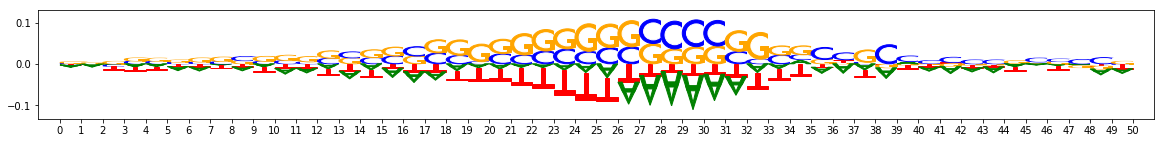

Task 0 actual importance scores:


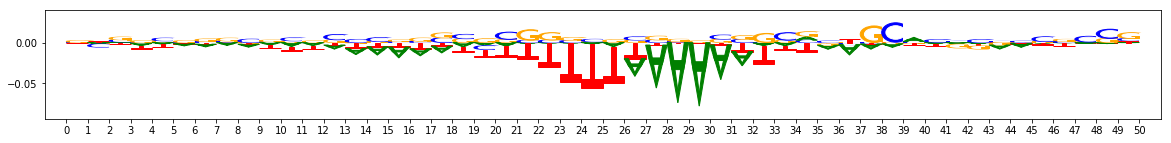

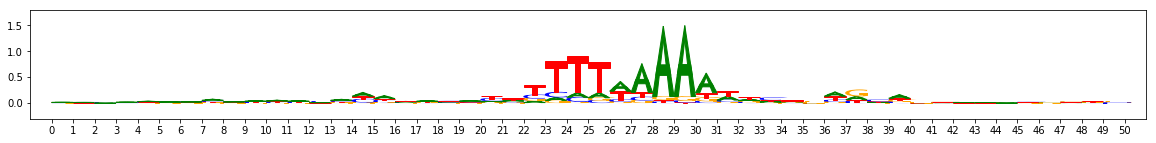

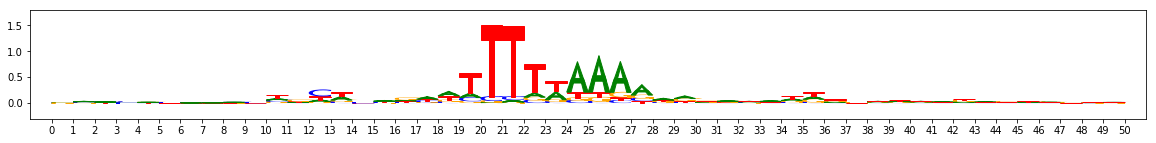

metacluster_1 pattern_7
total seqlets: 51
Task 0 hypothetical scores:


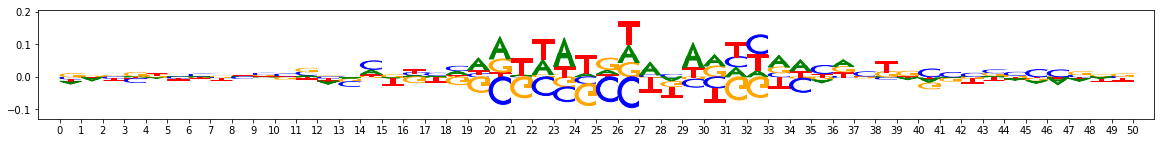

Task 0 actual importance scores:


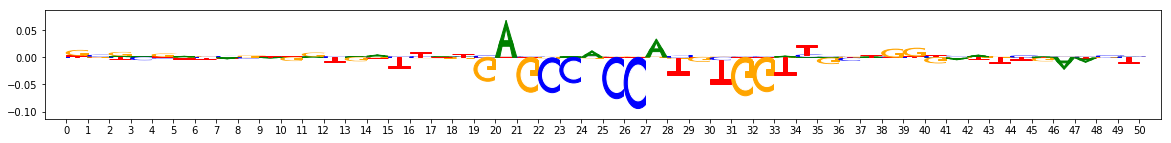

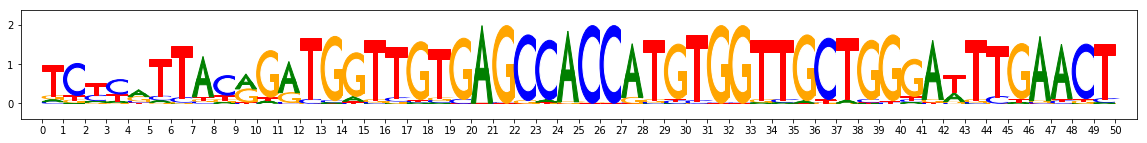

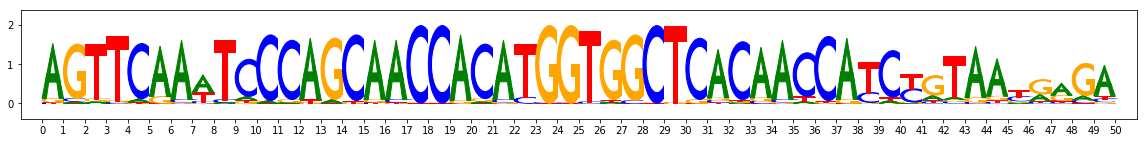

In [3]:
import h5py
import modisco.util
reload(modisco.util)

from collections import Counter
from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

hdf5_results = h5py.File("CTCFZF10_actB_vsWT_1000bp_conv3LowFiltTop_TFModiscoResults.h5","r")

print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        background = np.array([0.29, 0.21, 0.21, 0.29])
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 
        
hdf5_results.close()

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 1044
Task 0 hypothetical scores:


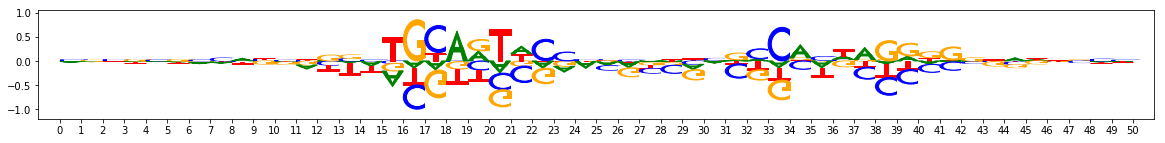

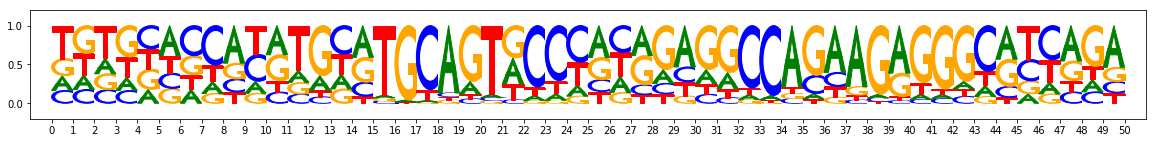

[[ -1.86022349e-02   1.08534640e-02   1.02800526e-02  -1.12482523e-02]
 [ -5.95508774e-03  -2.73733061e-03   1.41241326e-02  -5.66606661e-03]
 [ -1.98279790e-03   1.34243839e-02  -2.61631689e-03   1.11448145e-02]
 [ -9.69348504e-03  -2.50438420e-03   2.85388775e-02  -2.84690015e-02]
 [ -1.27800796e-02   1.65387446e-02  -1.43609975e-03   3.24405643e-03]
 [ -1.11543318e-02  -1.04669040e-02   2.50087991e-02  -2.80494145e-02]
 [ -2.30622979e-02   1.95096983e-02  -1.83240937e-02  -1.59338726e-02]
 [ -2.65774771e-02   6.06430102e-02  -9.09104452e-03  -1.43411171e-02]
 [  5.40159368e-02  -1.20675220e-02   2.30203245e-03  -4.39829128e-02]
 [  8.51456716e-03   2.27270747e-02  -6.69364847e-02   2.80921783e-02]
 [ -3.63054426e-03   1.37166237e-02  -5.06373286e-02  -2.00867298e-02]
 [ -8.56950607e-02  -3.30439537e-03  -7.96395792e-02   4.34890723e-02]
 [ -9.04279358e-03  -7.87078286e-02   1.21658646e-01  -1.10336335e-01]
 [ -4.06360241e-02   5.49121469e-02   6.94642354e-02  -2.52055805e-01]
 [ -1.

In [3]:
# Get the PFM with the most seqlets

hdf5_results = h5py.File("CTCFZF10_actB_vsWT_1000bp_conv3LowFiltTop_TFModiscoResults.h5","r")

activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    if metacluster_name != "metacluster_0":
        continue
    pattern_name = all_pattern_names[0]
    print(metacluster_name, pattern_name)
    all_patterns.append((metacluster_name, pattern_name))
    pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
    print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
    background = np.array([0.29, 0.21, 0.21, 0.29])
    print("Task 0 hypothetical scores:")
    viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
    viz_sequence.plot_weights(pattern["sequence"]["fwd"])
    print(np.array(pattern["task0_hypothetical_contribs"]["fwd"]))
    print(np.array(pattern["sequence"]["fwd"]))
        
hdf5_results.close()

metacluster_0
activity pattern: [1]
metacluster_0 pattern_1
total seqlets: 489
Task 0 hypothetical scores:


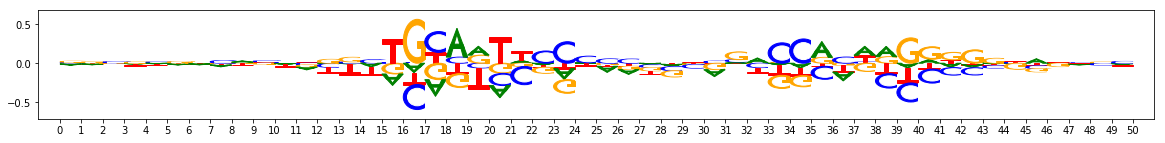

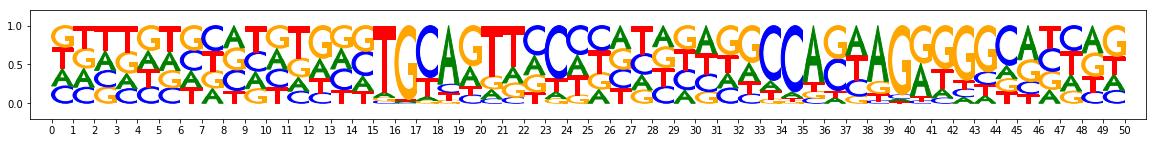

[[-1.73704690e-02  1.22406385e-02  1.28848257e-02 -9.33914617e-03]
 [-1.01311373e-02  6.14977212e-03  1.17587928e-02 -1.01062256e-02]
 [-7.53977863e-04  1.30962195e-02  4.93990771e-03  9.12073874e-04]
 [-7.87959675e-03 -3.61905884e-03  1.53415115e-02 -2.03883203e-02]
 [-9.66382507e-03  8.62786412e-03  6.79133016e-03 -1.03018200e-02]
 [-1.35996616e-02  4.70680554e-03  1.58249943e-02 -9.30235319e-03]
 [-1.29527676e-02  1.68087867e-03  7.51092209e-03 -8.11546841e-03]
 [-2.38192209e-02  3.44621764e-02 -5.05156733e-03 -1.69671757e-02]
 [ 1.66790122e-02  3.03986995e-03  1.00289594e-02 -2.30428287e-02]
 [ 7.79661801e-03  1.20382273e-02 -1.21408627e-02  1.03083845e-02]
 [-1.18978216e-02  6.41132369e-03 -3.20179691e-03 -2.69326380e-02]
 [-3.46001636e-02 -2.08226800e-02 -2.90945549e-02  2.00851290e-02]
 [-7.64946656e-03 -4.46021341e-02  4.92474814e-02 -6.89990664e-02]
 [-1.08769164e-02  1.83675023e-02  5.69550763e-02 -1.33101691e-01]
 [-4.85394252e-02  4.10902629e-02  3.19140535e-03 -1.07617931e

In [5]:
# Get the PFM with the alternative spacing

hdf5_results = h5py.File("CTCFZF10_actB_vsWT_1000bp_conv3LowFiltTop_TFModiscoResults.h5","r")

activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    if metacluster_name != "metacluster_0":
        continue
    pattern_name = all_pattern_names[1]
    print(metacluster_name, pattern_name)
    all_patterns.append((metacluster_name, pattern_name))
    pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
    print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
    background = np.array([0.29, 0.21, 0.21, 0.29])
    print("Task 0 hypothetical scores:")
    viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
    viz_sequence.plot_weights(pattern["sequence"]["fwd"])
    print(np.array(pattern["task0_hypothetical_contribs"]["fwd"]))
    print(np.array(pattern["sequence"]["fwd"]))
        
hdf5_results.close()